In [1]:
import colorsys
import maskingtools
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.ndimage as ndimage

In [2]:
# load images in
data_path = '/home/michaelneuder/research/imagequalityanalysis/nature_pics/'

In [3]:
pic_array = [mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(ii))) / 255 for ii in range(1,51)]

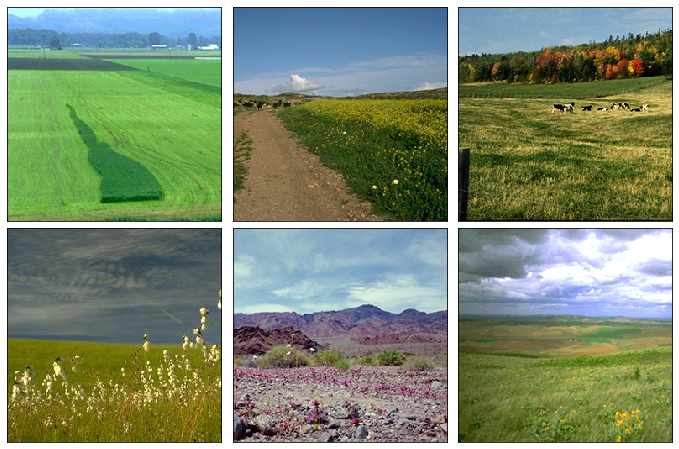

In [4]:
# data check
ax_dict = maskingtools.getImageGridAxes(rows=2, columns=3)
for ii in ax_dict:
    ax_dict[ii].imshow(pic_array[np.random.randint(1,50)])
plt.show()

In [5]:
# black and white images
pic_array = [maskingtools.rgbToBwImage(image) for image in pic_array]

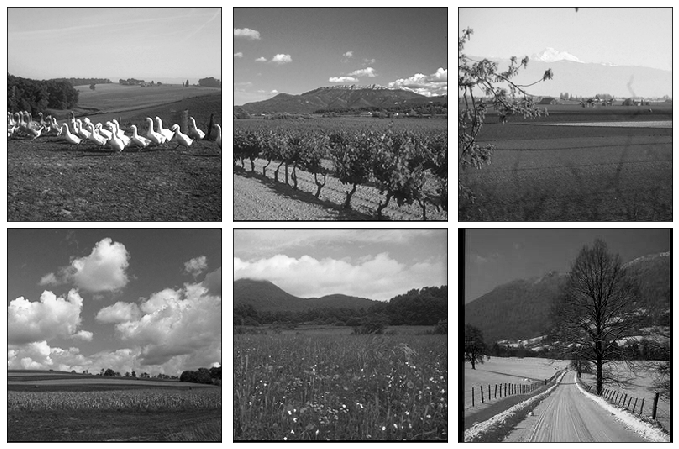

In [70]:
ax_dict = maskingtools.getImageGridAxes(rows=2, columns=3)
for ii in ax_dict:
    ax_dict[ii].imshow(pic_array[np.random.randint(1,50)], cmap='gray')
plt.savefig('bw_sanity.png')
plt.show()

In [76]:
# create a mask
def createMask(n=20, sigma=0):
    rows, cols = pic_array[0].shape
    mask = np.zeros((rows,cols))
    for ii in range(n):
        # zscore zscore -> random rotation -> gaussian blur
        mask += ndimage.gaussian_filter(
            np.rot90(
                maskingtools.zscore(
                    pic_array[np.random.randint(0,49)]
                ), np.random.choice([0,1,2,3]))
        , sigma=sigma)

    # map to [0,1]
    mask = maskingtools.uniform(mask)
    return mask

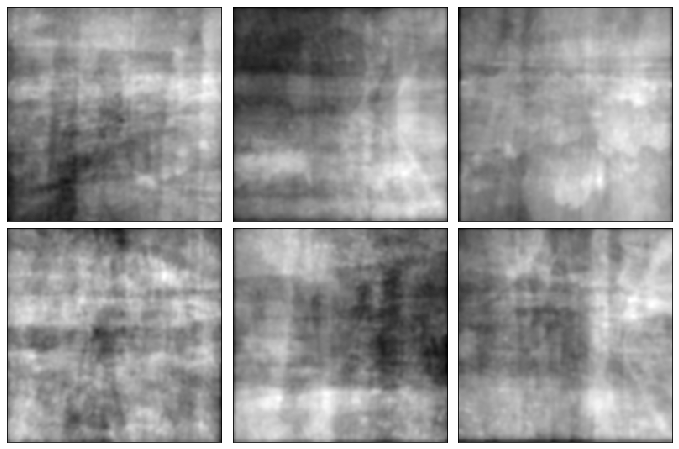

In [93]:
ax_dict = maskingtools.getImageGridAxes(rows=2, columns=3)
for ii in ax_dict:
    mask = createMask(sigma=2)
    ax_dict[ii].imshow(mask, cmap='gray')
plt.savefig('bw_masks.png')
plt.show()

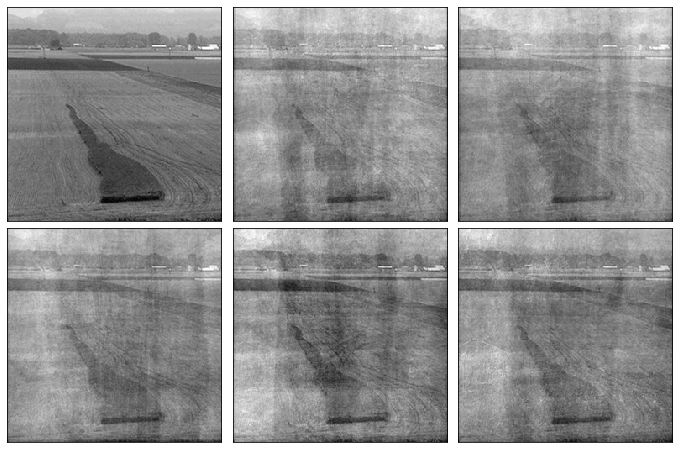

In [229]:
ax_dict = maskingtools.getImageGridAxes(rows=2, columns=3)
source = maskingtools.uniform(maskingtools.zscore(pic_array[np.random.randint(0,49)]))
ax_dict[0].imshow(source, cmap='gray')
for ii in range(1,6):
    mask = createMask(n=50,sigma=0)
    ax_dict[ii].imshow(maskingtools.uniform(source+mask), cmap='gray')
plt.savefig('bw_masksn25s10.png')
plt.show()

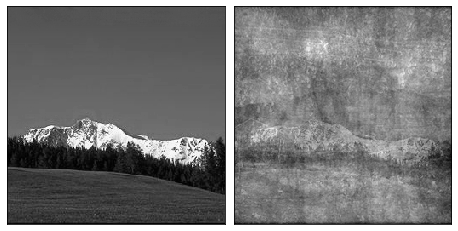

In [256]:
source = maskingtools.uniform(maskingtools.zscore(pic_array[np.random.randint(0,49)]))
mask = createMask(n=25,sigma=0)
ax_dict = maskingtools.getImageGridAxes(rows=1, columns=2)
ax_dict[0].imshow(source, cmap='gray')
ax_dict[1].imshow(mask, cmap='gray')
plt.show()

In [257]:
source.mean(), mask.mean()

(0.3362526166557086, 0.5016114568866248)

In [258]:
source -= source.mean()
mask -= mask.mean()

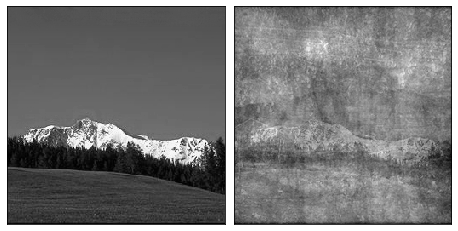

In [259]:
ax_dict = maskingtools.getImageGridAxes(rows=1, columns=2)
ax_dict[0].imshow(source, cmap='gray')
ax_dict[1].imshow(mask, cmap='gray')
plt.savefig('imgmask.png')
plt.show()

In [265]:
mpSource = (1/rows*cols) * sum((source.flatten() - source.mean())**2)
mpMask = (1/rows*cols) * sum((mask.flatten() - mask.mean())**2)

In [284]:
alphas = [0,0.1,0.25, 0.5, 0.75, 1]

In [285]:
distorted = ((source - source.mean() / np.sqrt(mpSource)) + alpha * (mask - mask.mean() / np.sqrt(mpMask))) * np.sqrt(mpSource) + source.mean() 

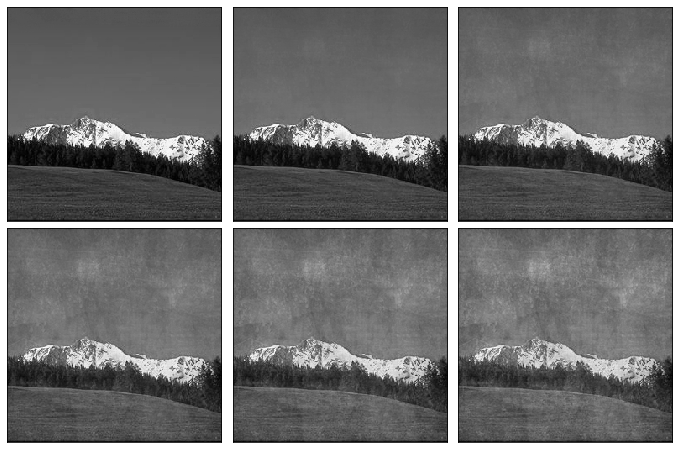

In [287]:
ax_dict = maskingtools.getImageGridAxes(rows=2, columns=3)
for ii in range(0,6):
    distorted = ((source - source.mean() / np.sqrt(mpSource)) + alphas[ii] * (mask - mask.mean() / np.sqrt(mpMask))) * np.sqrt(mpSource) + source.mean() 
    ax_dict[ii].imshow(distorted, cmap='gray')
plt.savefig('distortionalphas.png')
plt.show()